# Regression based on new Data from [OpenDataSoft](https://public.opendatasoft.com/explore/dataset/air-bnb-listings/information/?disjunctive.neighbourhood&disjunctive.column_10&disjunctive.city)


#### [NY-DataSet](https://insideairbnb.com/get-the-data/)

# 1. Explore Data



Identify:

- how many missing values in each column: NaN, Null, ..
- range of values in each column
- Invalid values for co-ordinates: e.g. for NY latitude should be between (40.5, 40.9) and  longitude is between (-74.25 ,  -73.7 )
- lacking categories for vategorical values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file without specifying usecols
df_raw = pd.read_csv("air-bnb-listings.csv", sep=';')


df_raw.head(4)

Room ID                                        Name    Host ID  \
0  36089263             Your Home in the bohemian Monti  271482048   
1  36130576  Green Vatican, apartment for 4 to 6 people   64913226   
2  36261730                                 Magna Domus  272724290   
3  36265342            B&B PISKY'S Guest House stanza 4  156906681   

      Neighbourhood        Room type  Room Price  Minimum nights  \
0  I Centro Storico  Entire home/apt          50               1   
1  I Centro Storico  Entire home/apt          80               2   
2  I Centro Storico  Entire home/apt         130               2   
3   XIV Monte Mario       Hotel room          49               1   

   Number of reviews Date last review  Number of reviews per month  \
0                 43       2020-02-16                         3.82   
1                  0              NaN                          NaN   
2                  1       2019-10-23                         0.13   
3                  5       2019-10-22                         0.43   

   Rooms rent by the host  Availibility Updated Date  City Country  \
0                       1            30   2020-06-14  Rome   Italy   
1                       2           270   2020-06-14  Rome   Italy   
2                       1           180   2020-06-14  Rome   Italy   
3                       4           365   2020-06-14  Rome   Italy   

                              Coordinates                       Location  
0  41.896877731175024, 12.496011527652524  Italy, Rome, I Centro Storico  
1  41.903092655509404, 12.448489038775383  Italy, Rome, I Centro Storico  
2    41.8895723880464, 12.509237858154002  Italy, Rome, I Centro Storico  
3  41.912407477595266, 12.428739415819877   Italy, Rome, XIV Monte Mario

In [2]:
df = df_raw


# sybset the data for ny
df = df[df['City'] == 'New-york-city']

df = df.drop(columns=["Country", "City", "Location"])

df[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True)
df.drop(columns=['Coordinates'], inplace=True)


# Remove trailing and leading spaces
cleaned_columns = [col.strip() for col in df.columns]

# Capitalize each word
cleaned_columns = [col.title() for col in cleaned_columns]

# Merge words by removing internal spaces
cleaned_columns = [''.join(col.split()) for col in cleaned_columns]

# Update the column labels in the DataFrame
df.columns = cleaned_columns


# Categorize columns
categorical_cols = ['Neighbourhood', 'RoomType']
continuous_cols = ['RoomId', 'HostId', 'MinimumNights','NumberOfReviews','NumberOfReviewsPerMonth', 'RoomsRentByTheHost',  'Availibility', 'RoomPrice']
coordinate_cols = ["Latitude", "Longitude"]
text_cols = ['Name', 'host_name']
dateTime = ['DateLastReview','UpdatedDate']

df[continuous_cols] = df[continuous_cols].apply(pd.to_numeric, errors='coerce')
df[coordinate_cols] = df[coordinate_cols].apply(pd.to_numeric, errors='coerce')


# save the data
# df.to_pickle('airbnb_nyc_data_2.pkl')

df.head(3)

RoomId                                 Name    HostId    Neighbourhood  \
3196  9026203                 Subway-Ocean-Parking  31680304        Gravesend   
3197  9047417  King Bed,Entire Home Downtown, WiFi  31153462  Lower East Side   
3198  9059931     Private room with queen size bed  24629261    Randall Manor   

             RoomType  RoomPrice  MinimumNights  NumberOfReviews  \
3196     Private room         80              2               69   
3197  Entire home/apt        140              7                3   
3198     Private room         60              3               25   

     DateLastReview  NumberOfReviewsPerMonth  RoomsRentByTheHost  \
3196     2019-12-02                     1.23                   2   
3197     2016-01-05                     0.05                   1   
3198     2018-12-04                     0.48                   1   

      Availibility UpdatedDate   Latitude  Longitude  
3196           146  2020-07-07  40.588494 -73.972971  
3197             0  2020-07-07  40.721608 -73.992480  
3198            35  2020-07-07  40.638795 -74.106262

In [3]:
df.head(5)

RoomId                                              Name    HostId  \
3196  9026203                              Subway-Ocean-Parking  31680304   
3197  9047417               King Bed,Entire Home Downtown, WiFi  31153462   
3198  9059931                  Private room with queen size bed  24629261   
3199  9078222               Prospect Park 3 bdrm, Sleeps 8 (#2)  47219962   
3200  9116126  SUNNY & VIBRANT 1 Bedroom Apt on CENTRAL PARK ☀️   3883685   

                  Neighbourhood         RoomType  RoomPrice  MinimumNights  \
3196                  Gravesend     Private room         80              2   
3197            Lower East Side  Entire home/apt        140              7   
3198              Randall Manor     Private room         60              3   
3199  Prospect-Lefferts Gardens  Entire home/apt        150              2   
3200            Upper West Side  Entire home/apt        199             14   

      NumberOfReviews DateLastReview  NumberOfReviewsPerMonth  \
3196               69     2019-12-02                     1.23   
3197                3     2016-01-05                     0.05   
3198               25     2018-12-04                     0.48   
3199              147     2020-01-01                     2.58   
3200               22     2019-10-28                     0.56   

      RoomsRentByTheHost  Availibility UpdatedDate   Latitude  Longitude  
3196                   2           146  2020-07-07  40.588494 -73.972971  
3197                   1             0  2020-07-07  40.721608 -73.992480  
3198                   1            35  2020-07-07  40.638795 -74.106262  
3199                   2           188  2020-07-07  40.661484 -73.960821  
3200                   1           100  2020-07-07  40.786040 -73.970577

In [4]:
list(df.columns)

['RoomId',
 'Name',
 'HostId',
 'Neighbourhood',
 'RoomType',
 'RoomPrice',
 'MinimumNights',
 'NumberOfReviews',
 'DateLastReview',
 'NumberOfReviewsPerMonth',
 'RoomsRentByTheHost',
 'Availibility',
 'UpdatedDate',
 'Latitude',
 'Longitude']

In [5]:
# import pickle


# # Load the data from the .pkl file
# with open('airbnb_nyc_data_2.pkl', 'rb') as f:
#     df = pickle.load(f)

# print("Dimensions of data: ",df.shape, "\n\n")

# df.head(4)

### Distinct values

In [6]:
distinct_categorical = df[categorical_cols].nunique()


print(distinct_categorical)

Neighbourhood    222
RoomType           4
dtype: int64


### Missing Values

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

RoomId                         0
Name                          18
HostId                         0
Neighbourhood                  0
RoomType                       0
RoomPrice                      0
MinimumNights                  0
NumberOfReviews                0
DateLastReview             11358
NumberOfReviewsPerMonth    11358
RoomsRentByTheHost             0
Availibility                   0
UpdatedDate                    0
Latitude                       0
Longitude                      0
dtype: int64


### Invalid values

- negative values in continuous columns must be invalid
- Latitude and Longitude for NYC: approx. latitude between 40.5 and 40.9, longitude between -74.25 and -73.7

In [8]:
# Invalid values:

# Check for negative values in continuous columns
invalid_values = df[continuous_cols][df[continuous_cols] < 0].count()

# Latitude and Longitude for NYC: approx. latitude between 40.5 and 40.9, longitude between -74.25 and -73.7
invalid_geo = df[(df['Latitude'] < 40.4774) | (df['Latitude'] > 40.9) | (df['Longitude'] < -74.25) | (df['Longitude'] > -73.7)].count()


print("\nInvalid Values in Continuous Columns:\n\n",invalid_values)
print("\nInvalid Geographic Coordinates:\n\n",invalid_geo)


Invalid Values in Continuous Columns:

 RoomId                     0
HostId                     0
MinimumNights              0
NumberOfReviews            0
NumberOfReviewsPerMonth    0
RoomsRentByTheHost         0
Availibility               0
RoomPrice                  0
dtype: int64

Invalid Geographic Coordinates:

 RoomId                     21
Name                       21
HostId                     21
Neighbourhood              21
RoomType                   21
RoomPrice                  21
MinimumNights              21
NumberOfReviews            21
DateLastReview             13
NumberOfReviewsPerMonth    13
RoomsRentByTheHost         21
Availibility               21
UpdatedDate                21
Latitude                   21
Longitude                  21
dtype: int64


In [9]:
# plot function
def barPlot(dict_, 
            color_, 
            title_='Query result of relevant documents', 
            xLabel='xLabel', 
            yLabel="yLabel", 
            rotation=45, 
            figsize=(12, 6)):

    import matplotlib.pyplot as plt
    plt.style.use('bmh')
    labels = list(dict_.keys())
    values = list(dict_.values())

    plt.figure(figsize=figsize)

    bars = plt.bar(labels, values, color=color_)
    
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title_)
    plt.xticks(rotation=rotation)  # Rotate x-axis labels for better visibility
    
    # Add numbers on top of the bars
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

    plt.show()


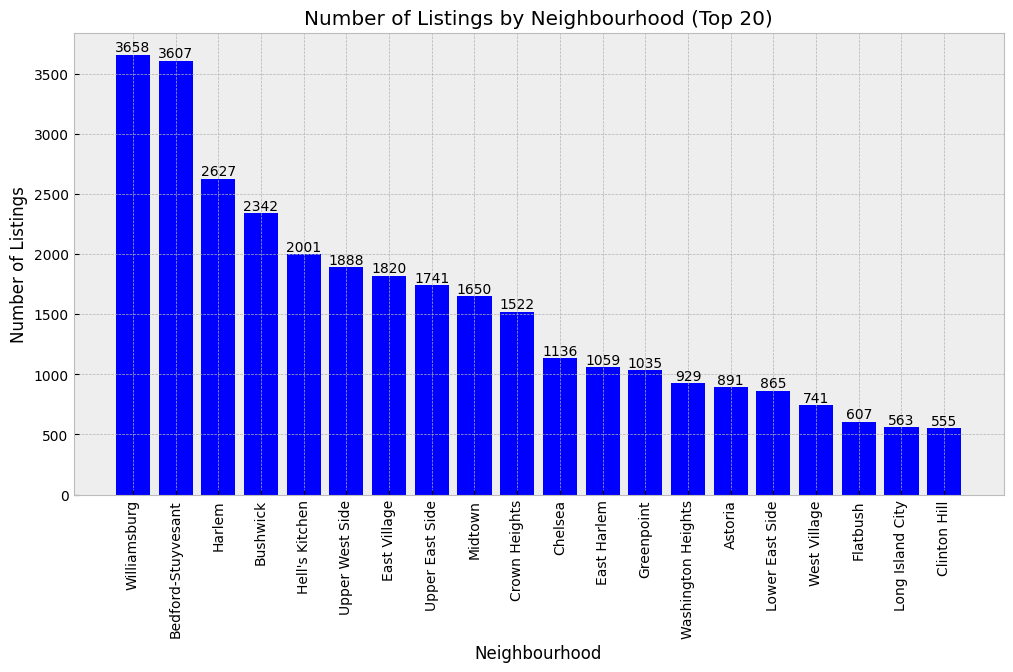

In [10]:
# Number of listings by neighbourhood (Top 20)
top_20_neighbourhoods = df['Neighbourhood'].value_counts().head(20)
data_dict_neighbourhood = dict(top_20_neighbourhoods)


# Plotting the bar plots
barPlot(data_dict_neighbourhood,
        color_='blue',
        title_='Number of Listings by Neighbourhood (Top 20)',
        xLabel="Neighbourhood",
        yLabel="Number of Listings",
        rotation= 90,
        figsize=(12, 6))

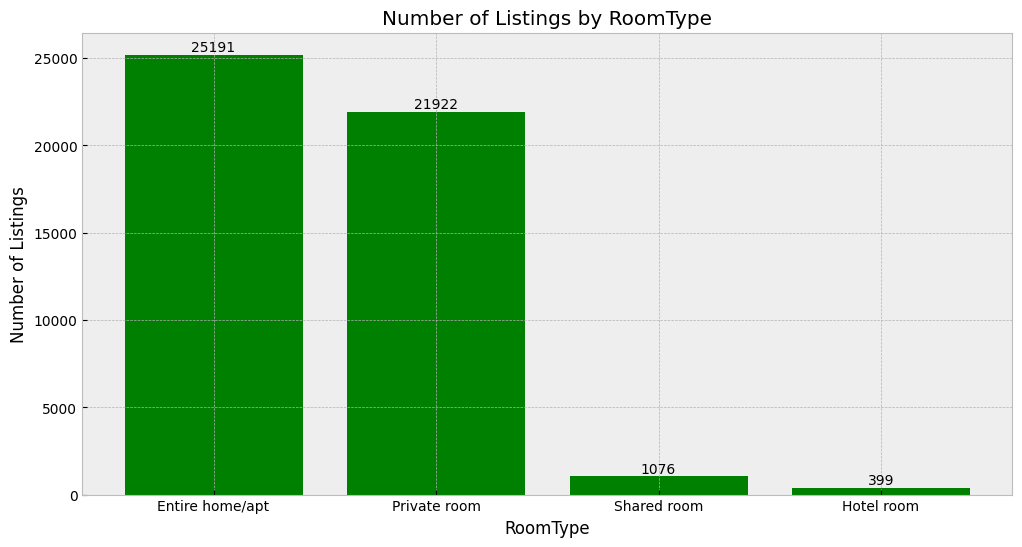

In [11]:
# Number of listings by neighbourhood_group
data_dict_neighbourhood_group = dict(df['RoomType'].value_counts())


barPlot(data_dict_neighbourhood_group,
        color_='green',
        title_='Number of Listings by RoomType',
        xLabel="RoomType",
        yLabel="Number of Listings",
        rotation= 0,
        figsize=(12, 6))

In [12]:
# Function to generate box plots
def boxPlot(data, x, y, title='Box Plot', xlabel='Category', ylabel='Price', figsize=(10, 6), rotation=45):
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    plt.boxplot(data.groupby(x)[y].apply(list), labels=data[x].unique())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.grid(True)
    plt.show()


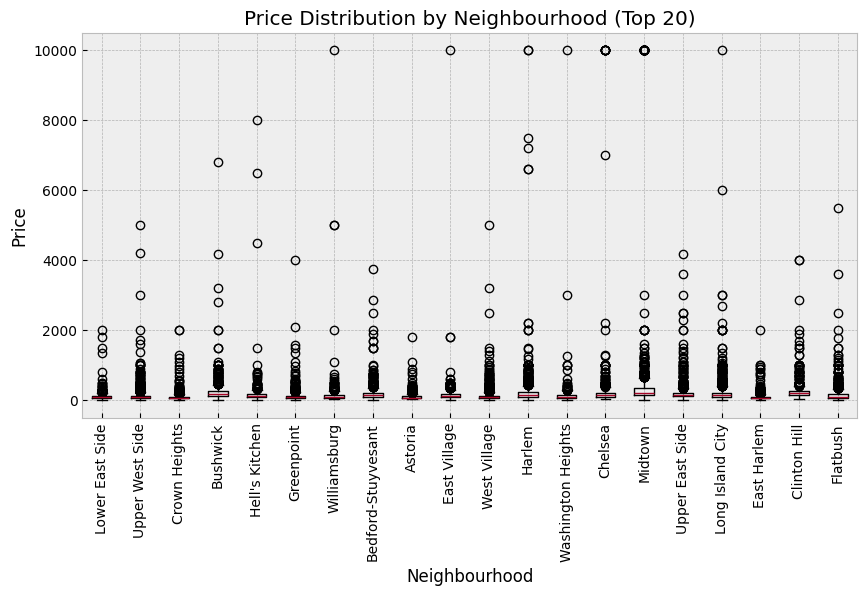

In [13]:
# Filter DataFrame to include only data for top 20 neighbourhoods
top_20_neighbourhoods = df['Neighbourhood'].value_counts().head(20).index
df_top_20_neighbourhoods = df[df['Neighbourhood'].isin(top_20_neighbourhoods)]

# Box plot for price by neighbourhood (Top 20)
boxPlot(df_top_20_neighbourhoods,
        x='Neighbourhood',
        y='RoomPrice',
        title='Price Distribution by Neighbourhood (Top 20)',
        xlabel='Neighbourhood',
        rotation = 90,
       figsize=(10, 5))

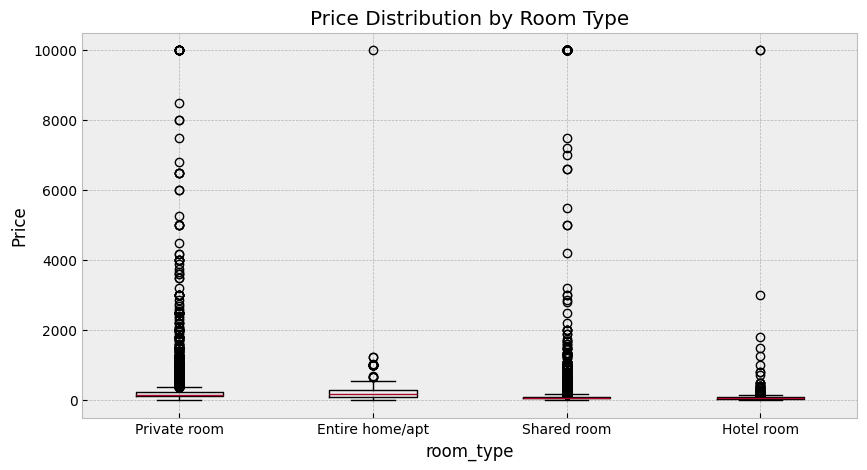

In [14]:

# Box plot for price by room_type
boxPlot(df, x='RoomType',
        y='RoomPrice',
        title='Price Distribution by Room Type',
        xlabel='room_type',
        rotation = 0,
        figsize=(10, 5))

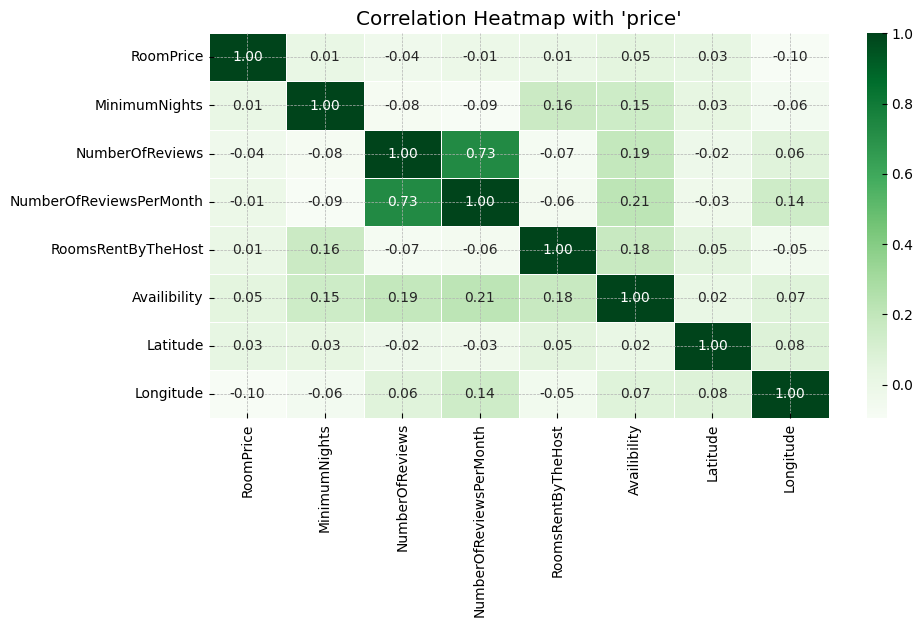

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


# Select continuous columns for correlation analysis
columns_for_correlation = ['RoomPrice','MinimumNights','NumberOfReviews','NumberOfReviewsPerMonth', 'RoomsRentByTheHost',  'Availibility', 'Latitude', 'Longitude']

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with 'price'")
plt.show()


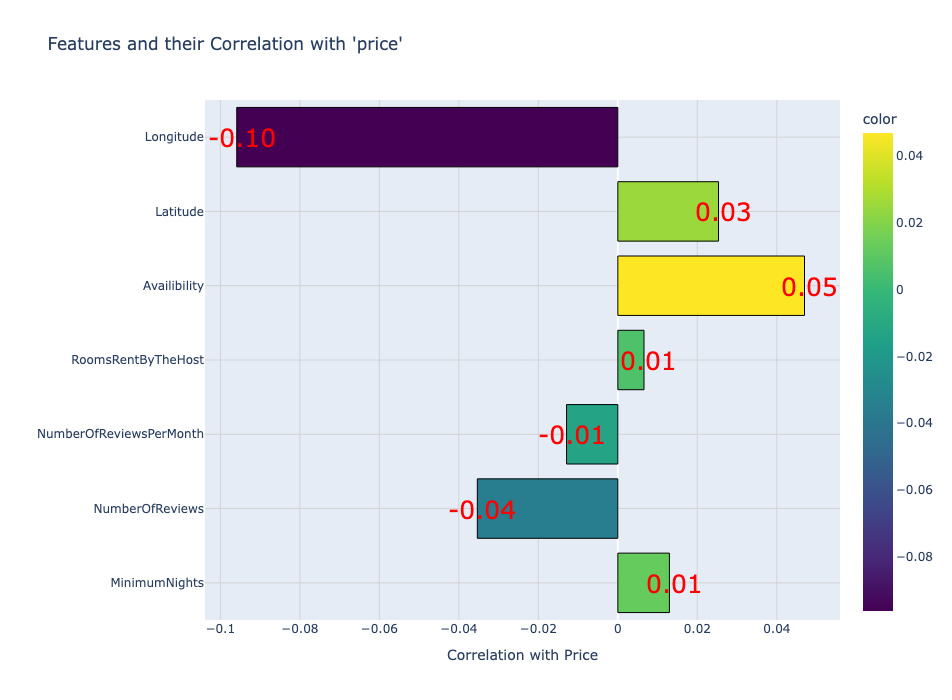

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Select continuous columns for correlation analysis
columns_for_correlation = ['RoomPrice','MinimumNights','NumberOfReviews','NumberOfReviewsPerMonth', 'RoomsRentByTheHost',  'Availibility', 'Latitude', 'Longitude']

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()

# Extract correlation coefficients with 'price' variable
price_correlation = correlation_matrix['RoomPrice'].drop('RoomPrice')  # Exclude correlation with itself

# Create a bar chart using Plotly with x and y axes exchanged
fig = px.bar(y=price_correlation.index,
             x=price_correlation.values,  # Swap x and y here
             labels={'y': '', 'x': 'Correlation with Price'},  # Swap labels
             title="Features and their Correlation with 'price'",
             color=price_correlation.values,
             color_continuous_scale='Viridis')

fig.update_traces(marker=dict(line=dict(color='black', width=1)))  # Add black borders to bars

# Add text annotations for correlation coefficient values
for i, value in enumerate(price_correlation.values):
    fig.add_annotation(y=price_correlation.index[i], x=value, text=f'{value:.2f}',  # Swap x and y here
                       showarrow=False, font=dict(color='red', size=25),
                       xshift=5, align='center')  # Swap xshift and yshift

# Update layout
fig.update_layout(yaxis_tickangle=0, height=700, width=1100,  # Swap height and width here
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey'),  # Swap x and y axis definitions
                  xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey'))  # Swap x and y axis definitions

# Show plot
fig.show()


# 2. Data Pre-processing ( Data Cleaning)

## Handling Missing values

- if it is `categorical` value, use the `most frequent` category
- if it is `continuous` value, replace with `median`
- if it is `text` value such as name and reviews, replace with `"Not Provided"`

In [17]:
# Function to fill missing values
def fill_missing_values(df):


    # Categorize columns
    categorical_cols = ['Neighbourhood', 'RoomType']
    continuous_cols = ['RoomId', 'HostId', 'RoomType', 'MinimumNights','NumberOfReviews','NumberOfReviewsPerMonth', 'RoomsRentByTheHost',  'Availibility']
    text_cols = ['Name']
    dateTime = ['DateLastReview','UpdatedDate']


    # for categorical values, replaces missing values with the mode (most frequent value) of each column.
    for col in categorical_cols:
        if df[col].isnull().any():
            df[col].fillna(df[col].mode()[0], inplace=True)

    # for continuous columns (continuous_cols), replace missing values with the median of each column.
    for col in continuous_cols:
        if df[col].isnull().any():
            df[col].fillna(df[col].median(), inplace=True)

    # For datetime columns, convert to datetime type with 'coerce' option
    for col in dateTime:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    # For text columns (text_cols), replace missing values with the string 'Not provided'
    for col in text_cols:
        df[col].fillna('Not provided', inplace=True)
    return df

In [18]:
df.tail(10)

RoomId                                               Name    HostId  \
1406363  8720702  Bright Modern Luxury with Statue of Liberty Vi...   2549463   
1406364  8737991                 Master Bedroom in Roofdeck Lux Apt   5270447   
1406365  8740683               AMAZING  2BR Apartment Elev/laundry!   1475015   
1406366  8844402                  Cozy room in the Heart of Astoria  45232769   
1406367  8864404                                       Darian Place  46401675   
1406368  8932929        Spacious Room in Bushwick with a back yard.  12502512   
1406369  8952816                  CHARMING  ROOM CLOSE TO MANHATTAN  45416627   
1406370  8964308                     Relaxing Modern Brooklyn Space   2968774   
1406371  8988451                               New York City Living  46953097   
1406372  8992894          CENTRAL PARK TOWNHOUSE Near Columbia Univ  46973966   

             Neighbourhood         RoomType  RoomPrice  MinimumNights  \
1406363  Battery Park City  Entire home/apt        175              7   
1406364           Bushwick     Private room        150              4   
1406365            Midtown  Entire home/apt        115             30   
1406366            Astoria     Private room         75              7   
1406367        East Harlem     Private room         83              1   
1406368           Bushwick     Private room         44              1   
1406369            Astoria     Private room         45              1   
1406370      Crown Heights  Entire home/apt        125              2   
1406371  Concourse Village     Private room         95              2   
1406372             Harlem  Entire home/apt        899             30   

         NumberOfReviews DateLastReview  NumberOfReviewsPerMonth  \
1406363                1     2019-11-03                     0.12   
1406364                0            NaN                      NaN   
1406365                1     2017-01-27                     0.02   
1406366              123     2020-03-08                     2.14   
1406367                0            NaN                      NaN   
1406368                1     2015-12-27                     0.02   
1406369              165     2020-03-11                     2.90   
1406370               10     2016-04-18                     0.17   
1406371                6     2016-08-14                     0.11   
1406372               57     2019-12-02                     1.00   

         RoomsRentByTheHost  Availibility UpdatedDate   Latitude  Longitude  
1406363                   1             0  2020-07-07  40.709198 -74.016191  
1406364                   1             0  2020-07-07  40.700670 -73.927223  
1406365                  51           365  2020-07-07  40.757660 -73.965654  
1406366                   3            55  2020-07-07  40.766641 -73.918354  
1406367                   1             0  2020-07-07  40.792198 -73.941485  
1406368                   1             0  2020-07-07  40.693814 -73.924395  
1406369                   9           365  2020-07-07  40.768115 -73.923405  
1406370                   2             0  2020-07-07  40.667121 -73.956462  
1406371                   1           173  2020-07-07  40.826270 -73.913052  
1406372                   2           365  2020-07-07  40.801033 -73.955110

In [19]:
# import pickle


# # Load the data from the .pkl file
# with open('airbnb_nyc_data_2.pkl', 'rb') as f:
#     dfx = pickle.load(f)



missing_values = df.isnull().sum()
missing_values

RoomId                         0
Name                          18
HostId                         0
Neighbourhood                  0
RoomType                       0
RoomPrice                      0
MinimumNights                  0
NumberOfReviews                0
DateLastReview             11358
NumberOfReviewsPerMonth    11358
RoomsRentByTheHost             0
Availibility                   0
UpdatedDate                    0
Latitude                       0
Longitude                      0
dtype: int64

In [20]:
df = fill_missing_values(df)
missing_values = df.isnull().sum()
missing_values

/var/folders/4v/4nsnz5ks1398nw00fy4kq0300000gn/T/ipykernel_3940/954827266.py:20: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/4v/4nsnz5ks1398nw00fy4kq0300000gn/T/ipykernel_3940/954827266.py:28: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

RoomId                         0
Name                           0
HostId                         0
Neighbourhood                  0
RoomType                       0
RoomPrice                      0
MinimumNights                  0
NumberOfReviews                0
DateLastReview             11358
NumberOfReviewsPerMonth        0
RoomsRentByTheHost             0
Availibility                   0
UpdatedDate                    0
Latitude                       0
Longitude                      0
dtype: int64

## Handle Invalid values

### Invalid Geographic entries
- THERE ARE 18 invalid geographic co-ordinates in the data.  
- e.g. invalid geographic co-ordinate, not within `lat`: (40.5, 40.9) `longitude`: (-74.25, -73.7) for NY,
- handling: `drop records`.

### invalid numerical values for numerical columns ( like nuber of reviews, number of listings, room price, etc)
- are negative
- 

In [21]:
import pandas as pd

def count_invalid_geo(df):
    """
    Count the entries with invalid geographic coordinates in the DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing 'Latitude' and 'Longitude' columns.

    Returns:
    int: Count of entries with invalid geographic coordinates.
    """

    # Convert 'Latitude' and 'Longitude' columns to numeric
    df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
    df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

    # Define invalid geographic coordinate ranges for NYC
    min_latitude, max_latitude = 40.4774, 40.9
    min_longitude, max_longitude = -74.25, -73.7

    # Count entries with invalid geographic coordinates
    invalid_geo_count = ((df['Latitude'] < min_latitude) | (df['Latitude'] > max_latitude) | 
                         (df['Longitude'] < min_longitude) | (df['Longitude'] > max_longitude)).sum()

    return invalid_geo_count


invalid_geo_count = count_invalid_geo(df)
print("Invalid Geographic Coordinates:", invalid_geo_count)

Invalid Geographic Coordinates: 21


In [22]:
import pandas as pd

def drop_invalid_geo(df):
    """
    Drop entries with invalid geographic coordinates from the DataFrame.
    """

    # Convert 'Latitude' and 'Longitude' columns to numeric
    df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
    df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

    # Define invalid geographic coordinate ranges for NYC
    min_latitude, max_latitude = 40.4774, 40.9
    min_longitude, max_longitude = -74.25, -73.7

    # Filter for valid geographic coordinates
    valid_geo_df = df[(df['Latitude'] >= min_latitude) & (df['Latitude'] <= max_latitude) &
                      (df['Longitude'] >= min_longitude) & (df['Longitude'] <= max_longitude)].copy()

    return valid_geo_df



df = drop_invalid_geo(df)
print("After handling Invalid Geographic Coordinates:", count_invalid_geo(df))

After handling Invalid Geographic Coordinates: 0


In [23]:
import pandas as pd

def count_invalid_continuous(df, continuous_cols):
    """
    Count the number of invalid entries for continuous columns in the DataFrame.

    """

    # Initialize counter for invalid entries
    invalid_count = 0

    # Iterate over continuous columns
    for col in continuous_cols:
        # Count negative entries
        invalid_count += (df[col] < 0).sum()

    return invalid_count


invalid_count = count_invalid_continuous(df, continuous_cols)
print("Number of Invalid Entries in Continuous Columns:", invalid_count)


Number of Invalid Entries in Continuous Columns: 0


In [24]:
# Latitude and Longitude for NYC: approx. latitude between 40.5 and 40.9, longitude between -74.25 and -73.7
invalid_geo = df[(df['Latitude'] < 40.4774) | (df['Latitude'] > 40.9) | (df['Longitude'] < -74.25) | (df['Longitude'] > -73.7)].count()


#print("\nInvalid Values in Continuous Columns:\n\n",invalid_values)
print("\nInvalid Geographic Coordinates:\n\n",invalid_geo)


Invalid Geographic Coordinates:

 RoomId                     0
Name                       0
HostId                     0
Neighbourhood              0
RoomType                   0
RoomPrice                  0
MinimumNights              0
NumberOfReviews            0
DateLastReview             0
NumberOfReviewsPerMonth    0
RoomsRentByTheHost         0
Availibility               0
UpdatedDate                0
Latitude                   0
Longitude                  0
dtype: int64


# Feature Selection

In [25]:
data_selected = df[['Neighbourhood', 'RoomType', 'MinimumNights', 'RoomsRentByTheHost', 'RoomPrice', 'Availibility', 'Latitude']]

data_selected

Neighbourhood         RoomType  MinimumNights  \
3196                     Gravesend     Private room              2   
3197               Lower East Side  Entire home/apt              7   
3198                 Randall Manor     Private room              3   
3199     Prospect-Lefferts Gardens  Entire home/apt              2   
3200               Upper West Side  Entire home/apt             14   
...                            ...              ...            ...   
1406368                   Bushwick     Private room              1   
1406369                    Astoria     Private room              1   
1406370              Crown Heights  Entire home/apt              2   
1406371          Concourse Village     Private room              2   
1406372                     Harlem  Entire home/apt             30   

         RoomsRentByTheHost  RoomPrice  Availibility   Latitude  
3196                      2         80           146  40.588494  
3197                      1        140             0  40.721608  
3198                      1         60            35  40.638795  
3199                      2        150           188  40.661484  
3200                      1        199           100  40.786040  
...                     ...        ...           ...        ...  
1406368                   1         44             0  40.693814  
1406369                   9         45           365  40.768115  
1406370                   2        125             0  40.667121  
1406371                   1         95           173  40.826270  
1406372                   2        899           365  40.801033  

[48567 rows x 7 columns]

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data_selected, columns=['Neighbourhood', 'RoomType'], drop_first=True)

# Define features (X) and target variable (y) with the encoded data
X = data_encoded.drop(columns=['RoomPrice'])
y = data_encoded['RoomPrice']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the linear regression model
model = LinearRegression()

# Train the model with training sets
model.fit(X_train, y_train)

# Make predictions with testing set
y_pred = model.predict(X_test)

# Evaluate model 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 198467.89966082425
R-squared: 0.04427107902616856


root Mean Squared Error: 445.4973621255509
R-squared: 0.04427107902616856


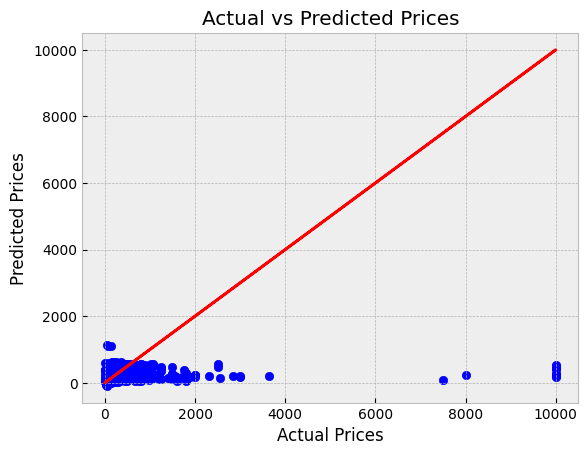

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data_selected, columns=['Neighbourhood', 'RoomType'], drop_first=True)

# Define features (X) and target variable (y) with the encoded data
X = data_encoded.drop(columns=['RoomPrice'])
y = data_encoded['RoomPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('root Mean Squared Error:', rmse)
print('R-squared:', r2)

# Plot data and regression line
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

Mean Squared Error: 198467.89966082425
R-squared: 0.04427107902616856


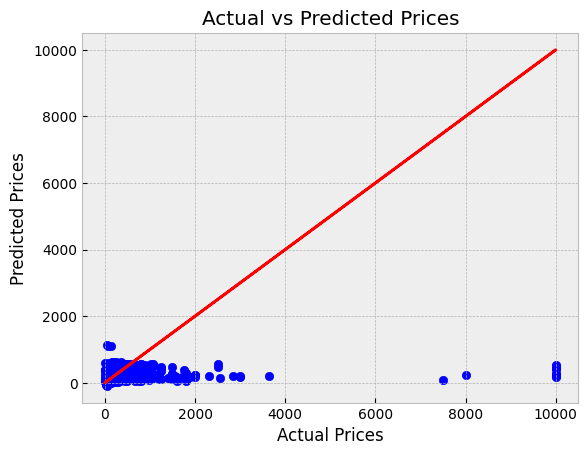

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data_selected, columns=['Neighbourhood', 'RoomType'], drop_first=True)

# Define features (X) and target variable (y) with the encoded data
X = data_encoded.drop(columns=['RoomPrice'])
y = data_encoded['RoomPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Plot data and regression line
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

The model perfomed `relly bad`. What's wrong ? Let's check the data further. 


# Outliers (Further Details about the data)

- Outliers: extreme values in price

In [29]:
data_selected.describe()

MinimumNights  RoomsRentByTheHost     RoomPrice  Availibility  \
count   48567.000000        48567.000000  48567.000000  48567.000000   
mean        8.355282            5.919163    165.614121    125.966562   
std        22.366895           23.561705    454.134823    143.094031   
min         1.000000            1.000000      0.000000      0.000000   
25%         2.000000            1.000000     67.000000      0.000000   
50%         3.000000            1.000000    100.000000     68.000000   
75%         6.000000            2.000000    175.000000    269.000000   
max      1250.000000          261.000000  10000.000000    365.000000   

           Latitude  
count  48567.000000  
mean      40.729282  
std        0.054772  
min       40.499438  
25%       40.689920  
50%       40.724037  
75%       40.762943  
max       40.899759

In [30]:
# box plots

import plotly.express as px
import plotly.graph_objects as go
import numpy as np

def boxPlot(data, x, y, title='Box Plot', xlabel='Category', ylabel='Price', figsize=(10, 6), rotation=45):
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    plt.boxplot(data.groupby(x)[y].apply(list), labels=data[x].unique())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.grid(True)
    plt.show()

# side-by-side box plots
def boxPlotSideBySide(data,
                      x1,
                      x2,
                      y,
                      title1='Box Plot 1',
                      title2='Box Plot 2',
                      xlabel='Category',
                      ylabel='Price',
                      figsize=(14, 6),
                      rotation=45):


    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(1, 2, figsize=figsize)

    axs[0].boxplot(data.groupby(x1)[y].apply(list), labels=data[x1].unique())
    axs[0].set_title(title1)
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)
    axs[0].set_xticklabels(data[x1].unique(), rotation=rotation)
    axs[0].grid(True)

    axs[1].boxplot(data.groupby(x2)[y].apply(list), labels=data[x2].unique())
    axs[1].set_title(title2)
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylabel(ylabel)
    axs[1].set_xticklabels(data[x2].unique(), rotation=rotation)
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()




# normal distribution  
def plot_price_distribution(df):
    """
    Create a Plotly visualization showing the price distribution with a normal distribution curve.

    Parameters:
    df (DataFrame): Input DataFrame containing the 'price' column.

    Returns:
    None
    """

    # Calculate mean and standard deviation of price column
    mean_price = df['RoomPrice'].mean()
    std_price = df['RoomPrice'].std()

    # Generate x values for the normal distribution curve
    x_values = np.linspace(mean_price - 3 * std_price, mean_price + 3 * std_price, 1000)

    # Calculate y values for the normal distribution curve
    y_values = (1 / (std_price * np.sqrt(2 * np.pi))) * np.exp(-(x_values - mean_price)**2 / (2 * std_price**2))

    # Create histogram of price distribution
    fig = px.histogram(df, x='RoomPrice', nbins=50, title='Price Distribution')

    # Add normal distribution curve to the plot
    fig.add_trace(go.Scatter(x=x_values, y=y_values, mode='lines', name='Normal Distribution'))

    # Show plot
    fig.show()

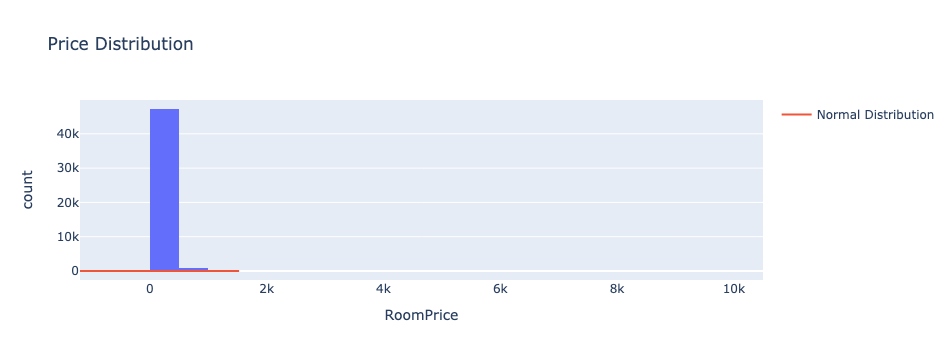

In [31]:
plot_price_distribution(df)

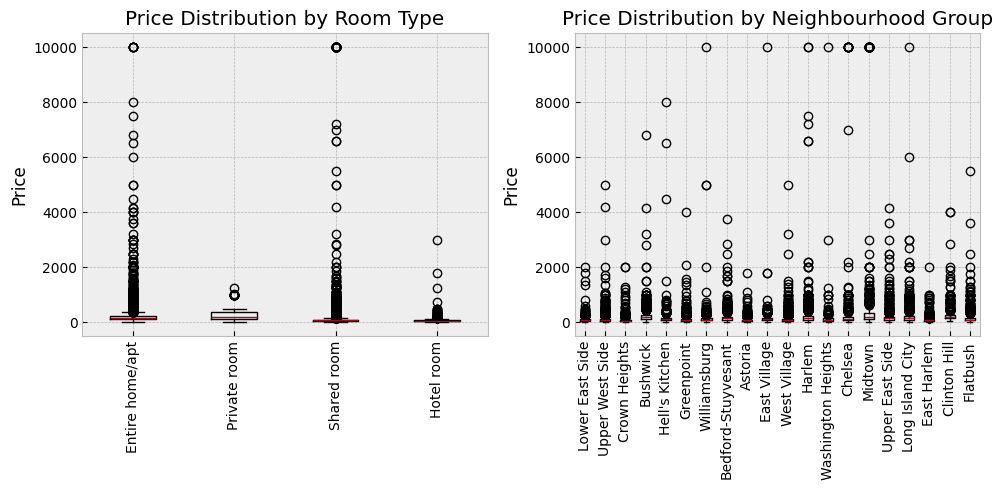

In [32]:
# Filter DataFrame to include only data for top 20 neighbourhoods
top_20_neighbourhoods = df['Neighbourhood'].value_counts().head(20).index
df_top_20_neighbourhoods = df[df['Neighbourhood'].isin(top_20_neighbourhoods)]



# Assuming df is already loaded and processed as in the previous code

# Box plot for room_type and neighbourhood_group side by side
boxPlotSideBySide(df_top_20_neighbourhoods,
                x1='RoomType',
                x2='Neighbourhood',
                y='RoomPrice',
                title1='Price Distribution by Room Type',
                title2='Price Distribution by Neighbourhood Group',
                xlabel='',
                ylabel='Price',
                figsize=(10, 5),
                rotation=90)


## Attempt-1: Remove Extreme Values

- pro: avoid some outliers
- con: loss of data / records

In [33]:
# set LB and upper bound

lower_limit, upper_limit = 100, 400


# exclude extreme prices
filtered_data = data_selected[(data_selected['RoomPrice'] > lower_limit) & (data_selected['RoomPrice'] < upper_limit)]

# Check the shape of the filtered DataFrame to see how many entries were removed
print("\n\nOriginal DataFrame shape:", data_selected.shape)
print("Filtered DataFrame shape:", filtered_data.shape)
print("\n")

filtered_data.describe()



Original DataFrame shape: (48567, 7)
Filtered DataFrame shape: (22194, 7)




MinimumNights  RoomsRentByTheHost     RoomPrice  Availibility  \
count   22194.000000        22194.000000  22194.000000  22194.000000   
mean        9.302649            7.812652    181.829368    130.595611   
std        23.931868           30.914316     64.798027    144.504958   
min         1.000000            1.000000    101.000000      0.000000   
25%         2.000000            1.000000    130.000000      0.000000   
50%         3.000000            1.000000    160.000000     81.500000   
75%         7.000000            2.000000    210.000000    282.000000   
max      1250.000000          261.000000    399.000000    365.000000   

           Latitude  
count  22194.000000  
mean      40.731390  
std        0.047031  
min       40.499438  
25%       40.700748  
50%       40.729149  
75%       40.761867  
max       40.899759

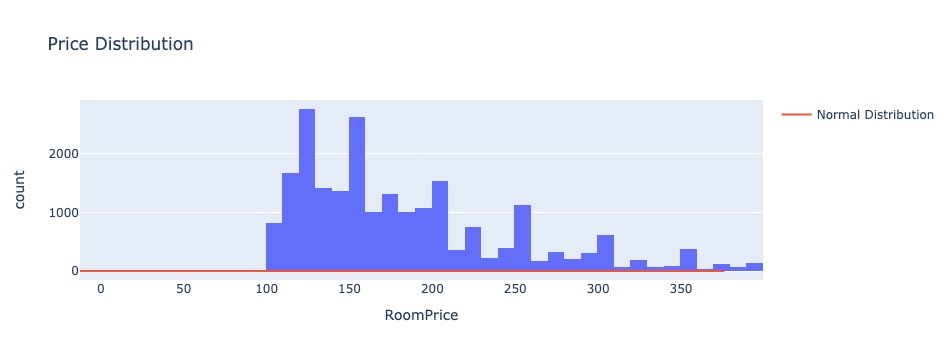

In [34]:
plot_price_distribution(filtered_data)

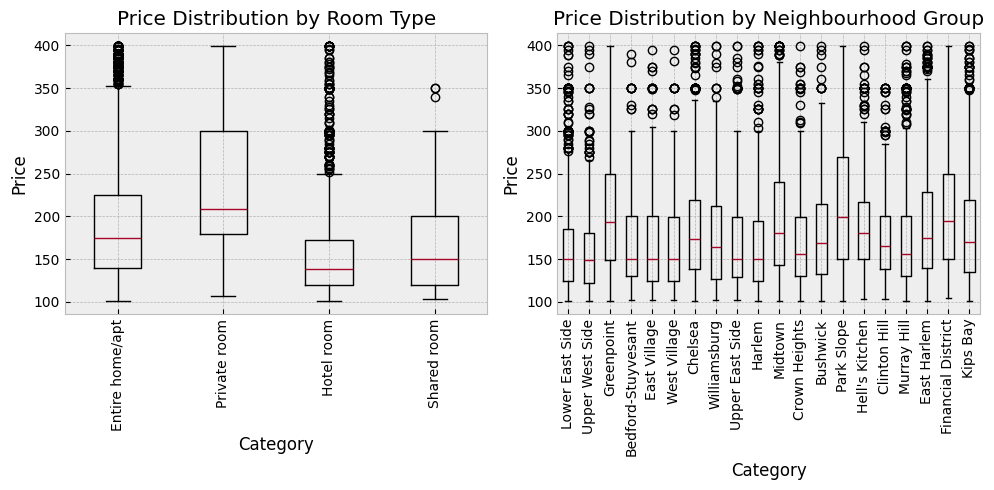

In [35]:
top_20_neighbourhoods = filtered_data['Neighbourhood'].value_counts().head(20).index
df_top_20_neighbourhoods = filtered_data[filtered_data['Neighbourhood'].isin(top_20_neighbourhoods)]

# Box plot for room_type and neighbourhood_group side by side
boxPlotSideBySide(df_top_20_neighbourhoods,
                x1='RoomType',
                x2='Neighbourhood',
                y='RoomPrice',
                title1='Price Distribution by Room Type',
                title2='Price Distribution by Neighbourhood Group',
                xlabel='Category',
                ylabel='Price',
                figsize=(10, 5),
                rotation=90)

In [36]:
filtered_data

Neighbourhood         RoomType  MinimumNights  \
3197               Lower East Side  Entire home/apt              7   
3199     Prospect-Lefferts Gardens  Entire home/apt              2   
3200               Upper West Side  Entire home/apt             14   
3204                    Greenpoint  Entire home/apt             20   
3205                   South Slope  Entire home/apt              3   
...                            ...              ...            ...   
1406362                    Concord  Entire home/apt              1   
1406363          Battery Park City  Entire home/apt              7   
1406364                   Bushwick     Private room              4   
1406365                    Midtown  Entire home/apt             30   
1406370              Crown Heights  Entire home/apt              2   

         RoomsRentByTheHost  RoomPrice  Availibility   Latitude  
3197                      1        140             0  40.721608  
3199                      2        150           188  40.661484  
3200                      1        199           100  40.786040  
3204                      1        108            89  40.727678  
3205                      1        150             0  40.662245  
...                     ...        ...           ...        ...  
1406362                   1        120           280  40.605480  
1406363                   1        175             0  40.709198  
1406364                   1        150             0  40.700670  
1406365                  51        115           365  40.757660  
1406370                   2        125             0  40.667121  

[22194 rows x 7 columns]

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(filtered_data, columns=['Neighbourhood', 'RoomType', 'Availibility'], drop_first=True)

# Define features (X) and target variable (y) with the encoded data
X = data_encoded.drop(columns=['RoomPrice'])
y = data_encoded['RoomPrice']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the linear regression model
model = LinearRegression()

# Train 
model.fit(X_train, y_train)

# Make predictions using test set
y_pred = model.predict(X_test)

# Evaluate  performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 3775.322554421432
R-squared: 0.06748109566592309


Mean Squared Error: 3709.7053373371723
R-squared: 0.08368879567004694


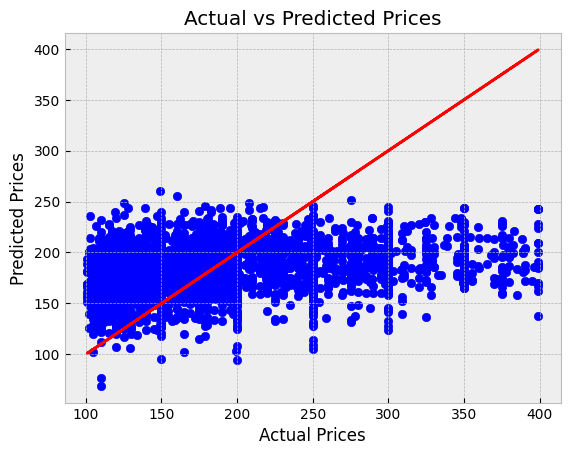

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(filtered_data, columns=['Neighbourhood', 'RoomType'], drop_first=True)

# Define features (X) and target variable (y) with the encoded data
X = data_encoded.drop(columns=['RoomPrice'])
y = data_encoded['RoomPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Plot data and regression line
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


Root Mean Squared Error: 60.90735043767027
R-squared: 0.08368879567004694


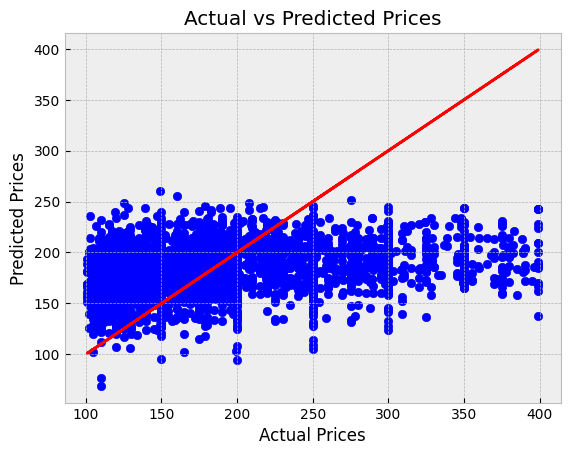

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(filtered_data, columns=['Neighbourhood', 'RoomType'], drop_first=True)

# Define features (X) and target variable (y) with the encoded data
X = data_encoded.drop(columns=['RoomPrice'])
y = data_encoded['RoomPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

# Plot data and regression line
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


Result improved! 


## Attempt-2: Further Cuts on extreme values



In [40]:
lower_limit, upper_limit = 100, 250

# Filter the DataFrame to exclude extreme prices
filtered_data_2 = data_selected[(data_selected['RoomPrice'] > lower_limit) & (data_selected['RoomPrice'] < upper_limit)]

# Check the shape of the filtered DataFrame to see how many entries were removed
print("Original DataFrame shape:", data_selected.shape)
print("Filtered DataFrame shape:", filtered_data_2.shape)


filtered_data_2.describe()

Original DataFrame shape: (48567, 7)
Filtered DataFrame shape: (18310, 7)


MinimumNights  RoomsRentByTheHost     RoomPrice  Availibility  \
count   18310.000000        18310.000000  18310.000000  18310.000000   
mean        9.343528            7.653086    157.511087    127.672638   
std        24.265955           29.656563     36.321846    143.716810   
min         1.000000            1.000000    101.000000      0.000000   
25%         2.000000            1.000000    125.000000      0.000000   
50%         3.000000            1.000000    150.000000     70.000000   
75%         7.000000            2.000000    185.000000    271.000000   
max      1250.000000          261.000000    249.000000    365.000000   

           Latitude  
count  18310.000000  
mean      40.730652  
std        0.047940  
min       40.499438  
25%       40.696229  
50%       40.728150  
75%       40.761901  
max       40.898650

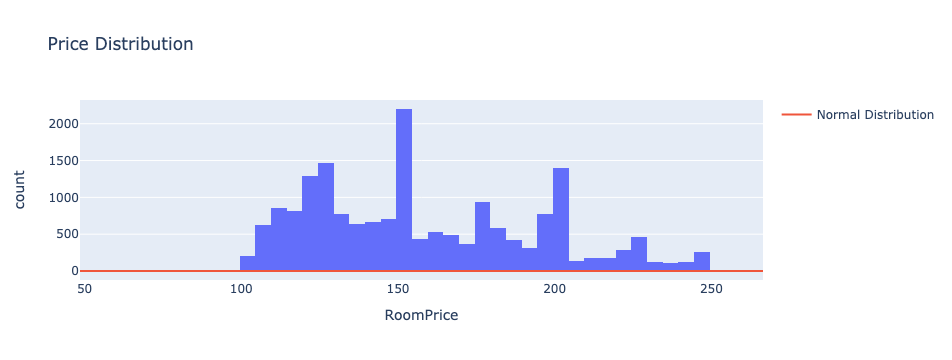

In [41]:
plot_price_distribution(filtered_data_2)

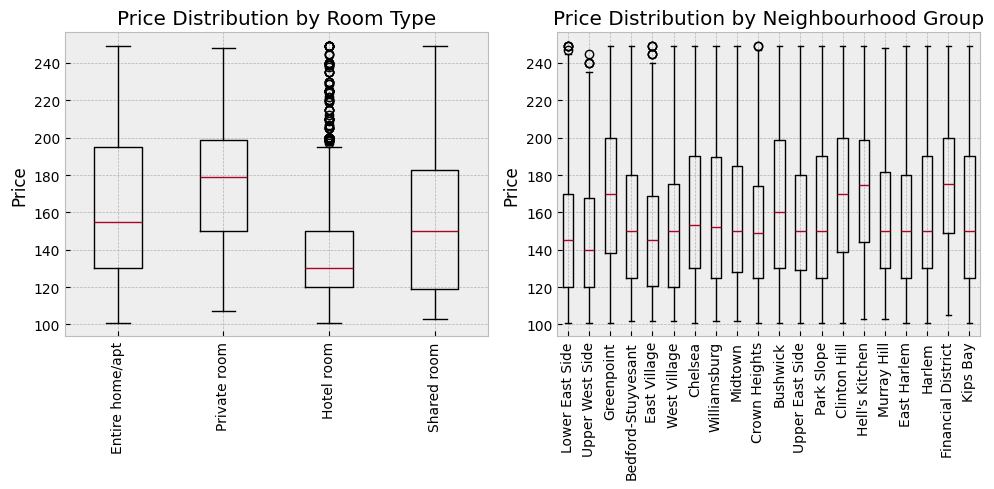

In [42]:
top_20_neighbourhoods = filtered_data_2['Neighbourhood'].value_counts().head(20).index
df_top_20_neighbourhoods = filtered_data_2[filtered_data_2['Neighbourhood'].isin(top_20_neighbourhoods)]

# Box plot for room_type and neighbourhood_group side by side
boxPlotSideBySide(df_top_20_neighbourhoods,
                x1='RoomType',
                x2='Neighbourhood',
                y='RoomPrice',
                title1='Price Distribution by Room Type',
                title2='Price Distribution by Neighbourhood Group',
                xlabel='',
                ylabel='Price',
                figsize=(10, 5),
                rotation=90)

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(filtered_data_2, columns=['Neighbourhood', 'RoomType'], drop_first=True)

# Define features (X) and target variable (y) with the encoded data
X = data_encoded.drop(columns=['RoomPrice'])
y = data_encoded['RoomPrice']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate model performance

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('root Mean Squared Error:', rmse)
print('R-squared:', r2)

root Mean Squared Error: 34.67955995095995
R-squared: 0.10113029063399614


Result improved! 


## Attempt-3: Further Cuts on extreme values


In [44]:
lower_limit, upper_limit = 100, 200

# Filter the DataFrame to exclude extreme prices
filtered_data_3 = data_selected[(data_selected['RoomPrice'] > lower_limit) & (data_selected['RoomPrice'] < upper_limit)]

# Check the shape of the filtered DataFrame to see how many entries were removed
print("Original DataFrame shape:", data_selected.shape)
print("Filtered DataFrame shape:", filtered_data_3.shape)

filtered_data_3.describe()

Original DataFrame shape: (48567, 7)
Filtered DataFrame shape: (15070, 7)


MinimumNights  RoomsRentByTheHost     RoomPrice  Availibility  \
count   15070.000000        15070.000000  15070.000000  15070.000000   
mean        9.196549            6.494824    145.164698    125.411347   
std        24.601562           24.649458     26.205104    142.585478   
min         1.000000            1.000000    101.000000      0.000000   
25%         2.000000            1.000000    124.000000      0.000000   
50%         3.000000            1.000000    145.000000     66.000000   
75%         7.000000            2.000000    165.000000    267.000000   
max      1250.000000          261.000000    199.000000    365.000000   

           Latitude  
count  15070.000000  
mean      40.730243  
std        0.049065  
min       40.499438  
25%       40.693477  
50%       40.727413  
75%       40.762485  
max       40.898650

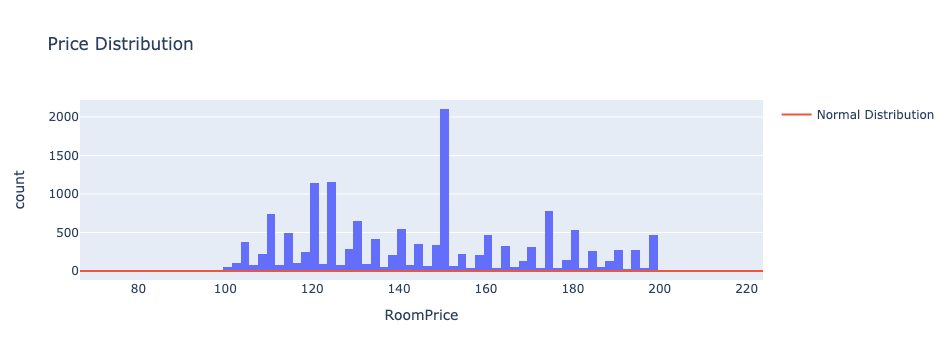

In [45]:
plot_price_distribution(filtered_data_3)

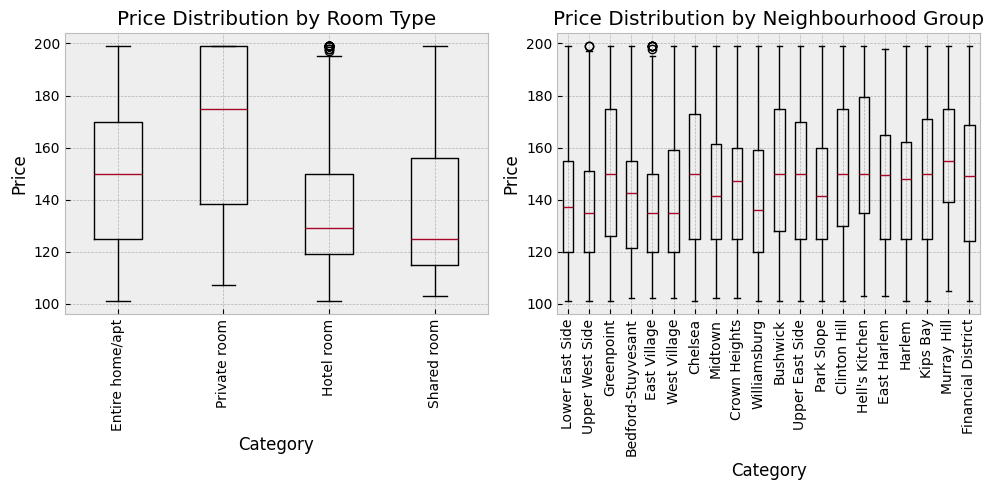

In [46]:
top_20_neighbourhoods = filtered_data_3['Neighbourhood'].value_counts().head(20).index
df_top_20_neighbourhoods = filtered_data_3[filtered_data_3['Neighbourhood'].isin(top_20_neighbourhoods)]

# Box plot for room_type and neighbourhood_group side by side
boxPlotSideBySide(df_top_20_neighbourhoods,
                x1='RoomType',
                x2='Neighbourhood',
                y='RoomPrice',
                title1='Price Distribution by Room Type',
                title2='Price Distribution by Neighbourhood Group',
                xlabel='Category',
                ylabel='Price',
                figsize=(10, 5),
                rotation=90)

# Linear Regression

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(filtered_data_2, columns=['Neighbourhood', 'RoomType'], drop_first=True)

# Define features (X) and target variable (y) with the encoded data
X = data_encoded.drop(columns=['RoomPrice'])
y = data_encoded['RoomPrice']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('root Mean Squared Error:', rmse)
print('R-squared:', r2)

root Mean Squared Error: 34.67955995095995
R-squared: 0.10113029063399614


## Gradient Boosting Regressor

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tqdm.notebook import tqdm



# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(filtered_data_2, columns=['Neighbourhood', 'RoomType'], drop_first=True)

# Define features (X) and target variable (y) with the encoded data
X = data_encoded.drop(columns=['RoomPrice'])
y = data_encoded['RoomPrice']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Train the model using tqdm for progress visualization
with tqdm(total=gb_regressor.n_estimators, desc="Training Progress") as pbar:
    gb_regressor.fit(X_train, y_train)
    pbar.update(gb_regressor.n_estimators)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('root Mean Squared Error:', rmse)
print('R-squared:', r2)


Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]

root Mean Squared Error: 34.07270633197471
R-squared: 0.13231348157717904


# K-nearest neighbour

In [49]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the K-nearest neighbor Regressor
knn_regressor = KNeighborsRegressor()

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_regressor.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse_knn)

r2_knn = r2_score(y_test, y_pred_knn)

print('K-nearest neighbor Regression - Mean Squared Error:', rmse)
print('K-nearest neighbor Regression - R-squared:', r2_knn)


K-nearest neighbor Regression - Mean Squared Error: 37.46519462516476
K-nearest neighbor Regression - R-squared: -0.049072675665188026


# Random forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest Regression - root Mean Squared Error:', rmse)
print('Random Forest Regression - R-squared:', r2_rf)


Random Forest Regression - root Mean Squared Error: 35.17095007032145
Random Forest Regression - R-squared: 0.075476851787743


# Support vector Regression

In [51]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor
svr_regressor = SVR()

# Train the model
svr_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_regressor.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print('Support Vector Regression - root Mean Squared Error:', rmse)
print('Support Vector Regression - R-squared:', r2_svr)


Support Vector Regression - root Mean Squared Error: 36.878619520327426
Support Vector Regression - R-squared: -0.01648014710571455


## hyper-parameter tuning over Gradient Boosting Regression now

In [52]:
# ### K-fold Cross validation

# ### Parameter Tuning - Grid Search | Randomized Search


# import pandas as pd
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Load data and perform one-hot encoding
# data_encoded = pd.get_dummies(filtered_data_2, columns=['Neighbourhood', 'RoomType'], drop_first=True)

# # Define features (X) and target variable (y) with the encoded data
# X = data_encoded.drop(columns=['RoomPrice'])
# y = data_encoded['RoomPrice']

# # Split the data into train, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Initialize models
# rf_model = RandomForestRegressor(random_state=42)
# xgb_model = XGBRegressor(random_state=42)

# # Perform k-fold cross-validation on the training set
# rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# # Train Random Forest model
# rf_model.fit(X_train, y_train)

# # Train XGBoost model
# xgb_model.fit(X_train, y_train)

# # Make predictions on the validation set
# rf_val_pred = rf_model.predict(X_val)
# xgb_val_pred = xgb_model.predict(X_val)

# # Evaluate models on validation set
# rf_val_mse = mean_squared_error(y_val, rf_val_pred)
# rf_val_r2 = r2_score(y_val, rf_val_pred)

# xgb_val_mse = mean_squared_error(y_val, xgb_val_pred)
# xgb_val_r2 = r2_score(y_val, xgb_val_pred)

# print('Random Forest:')
# print('Validation Mean Squared Error:', rf_val_mse)
# print('Validation R-squared:', rf_val_r2)

# print('\nXGBoost:')
# print('Validation Mean Squared Error:', xgb_val_mse)
# print('Validation R-squared:', xgb_val_r2)

# # Hyperparameter tuning for Random Forest
# rf_param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
# rf_grid_search.fit(X_train, y_train)

# # Hyperparameter tuning for XGBoost
# xgb_param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'min_child_weight': [1, 5, 10],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# xgb_random_search = RandomizedSearchCV(xgb_model, xgb_param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', verbose=2, random_state=42, n_jobs=-1)
# xgb_random_search.fit(X_train, y_train)

# # Select the best models
# best_rf_model = rf_grid_search.best_estimator_
# best_xgb_model = xgb_random_search.best_estimator_

# # Evaluate the best models on the test set
# rf_test_pred = best_rf_model.predict(X_test)
# xgb_test_pred = best_xgb_model.predict(X_test)

# rf_test_mse = mean_squared_error(y_test, rf_test_pred)
# rf_test_r2 = r2_score(y_test, rf_test_pred)

# xgb_test_mse = mean_squared_error(y_test, xgb_test_pred)
# xgb_test_r2 = r2_score(y_test, xgb_test_pred)

# print('\nBest Random Forest Model:')
# print('Test Mean Squared Error:', rf_test_mse)
# print('Test R-squared:', rf_test_r2)

# print('\nBest XGBoost Model:')
# print('Test Mean Squared Error:', xgb_test_mse)
# print('Test R-squared:', xgb_test_r2)
